In [16]:
from pandas import read_csv

In [17]:
data = read_csv("../data/iris.csv", index_col=0)

In [18]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
instant,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explorative Datenanalyse

In [19]:
# Statistische Gesamtauswertung aller numerischen Features
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Median von Sepal Length: 5.8
Standardabweichung von Sepal Length: 0.828066127977863


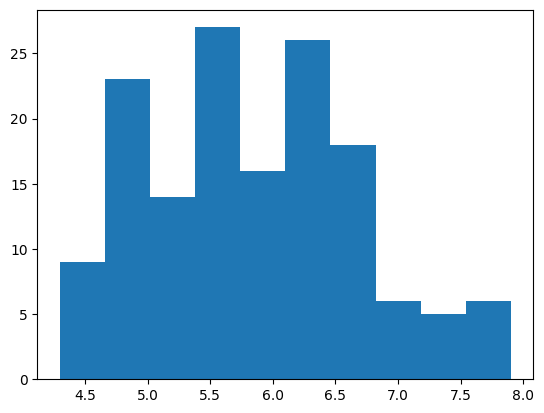

In [20]:
import matplotlib.pyplot as plt

# Histogramm für die Verteilung von sepal_length_cm
plt.hist(data['sepal_length_cm'])

# Zwei sinnvolle numerische Auswertungen
median = data['sepal_length_cm'].median()
std = data['sepal_length_cm'].std()

print("Median von Sepal Length:", median)
print("Standardabweichung von Sepal Length:", std)

Kovarianz zwischen Sepal Length und Petal Length: 1.27


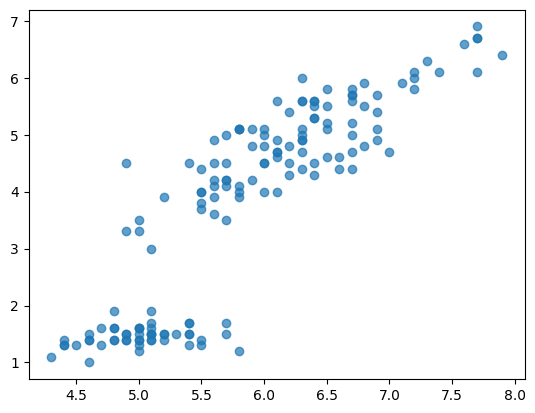

In [21]:
#Scatterplot zwischen Sepal Length und Petal Length
plt.scatter(data['sepal_length_cm'], data['petal_length_cm'], alpha=0.7)

# Kovarianz berechnen
covariance = data['sepal_length_cm'].cov(data['petal_length_cm'])
print(f"Kovarianz zwischen Sepal Length und Petal Length: {covariance:.2f}")

<Axes: >

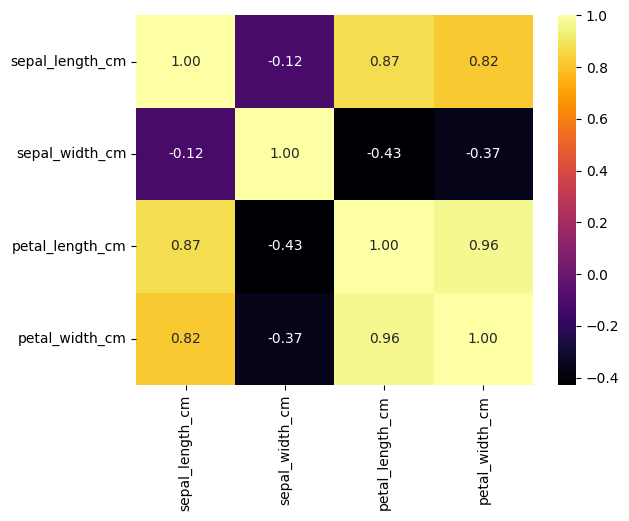

In [22]:
import seaborn as sb

# Korrelationsmatrix berechnen
corr_matrix = data.corr(numeric_only=True)

# Heatmap der Korrelationsmatrix plotten
sb.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")

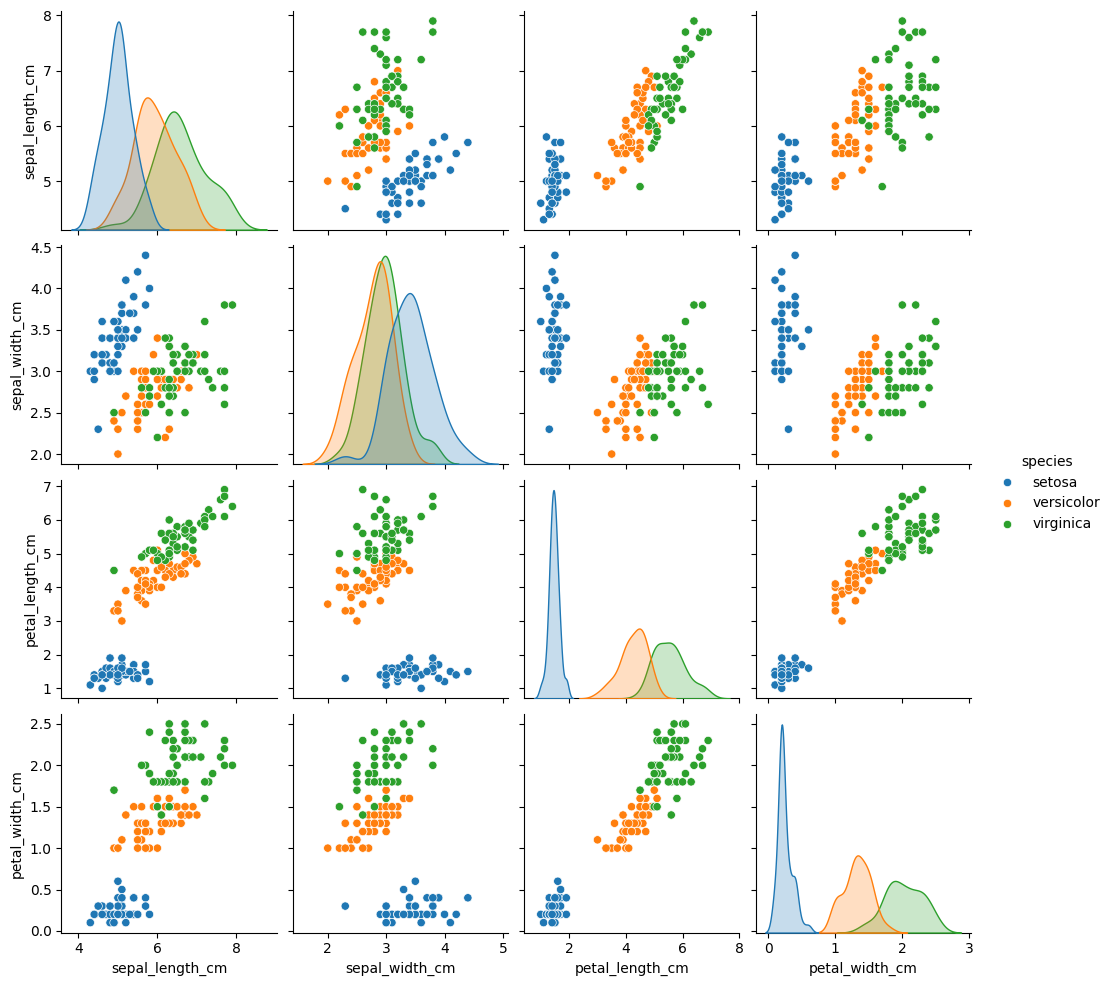

In [23]:
# Pairplot aller numerischen Merkmale im Datenset
sb.pairplot(data, vars=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'], hue='species')

---
## Interpretation der bisherigen Darstellungen und Auswertungen
---
### 1. Statistische Kennzahlen (data.describe()):
- Die numerischen Merkmale des Iris-Datensatzes zeigen unterschiedliche Mittelwerte und Streuungen.
- Zum Beispiel liegt der Mittelwert (mean) der Sepal Length bei etwa 5.84 cm, mit einer Standardabweichung von ca. 0.83 cm.
- Der Median (5.8 cm) liegt nahe am Mittelwert, was auf eine relativ symmetrische Verteilung hindeutet.
- Der Interquartilsabstand (IQR) von 1.3 cm zeigt eine moderate Streuung der Sepal Length.

### 2. Histogramm (plt.hist):
- Das Histogramm der Sepal Length zeigt, dass die meisten Werte zwischen 5 und 6 cm liegen.
- Es gibt wenige Ausreißer nach oben und unten, die Verteilung ist leicht rechtsschief.

### 3. Scatterplot und Kovarianz:
- Der Scatterplot zwischen Sepal Length und Petal Length zeigt eine deutliche positive Korrelation.
- Die berechnete Kovarianz (ca. 1.27) und die hohe Korrelation (ca. 0.87) bestätigen, dass größere Kelchblätter (Sepal) oft mit größeren Kronblättern (Petal) einhergehen.

### 4. Korrelationsmatrix und Heatmap:
- Die Heatmap der Korrelationsmatrix verdeutlicht, dass Sepal Length und Petal Length (0.87) sowie Petal Length und Petal Width (0.96) sehr stark korreliert sind.
- Sepal Width hingegen korreliert negativ mit den anderen Merkmalen, insbesondere mit Petal Length (-0.43).

### 5. Pairplot:
- Der Pairplot zeigt, dass sich die drei Iris-Arten anhand der Merkmale gut voneinander unterscheiden lassen.
- Besonders die Petal-Merkmale trennen die Arten deutlich.

---

## Unsupervised Learning

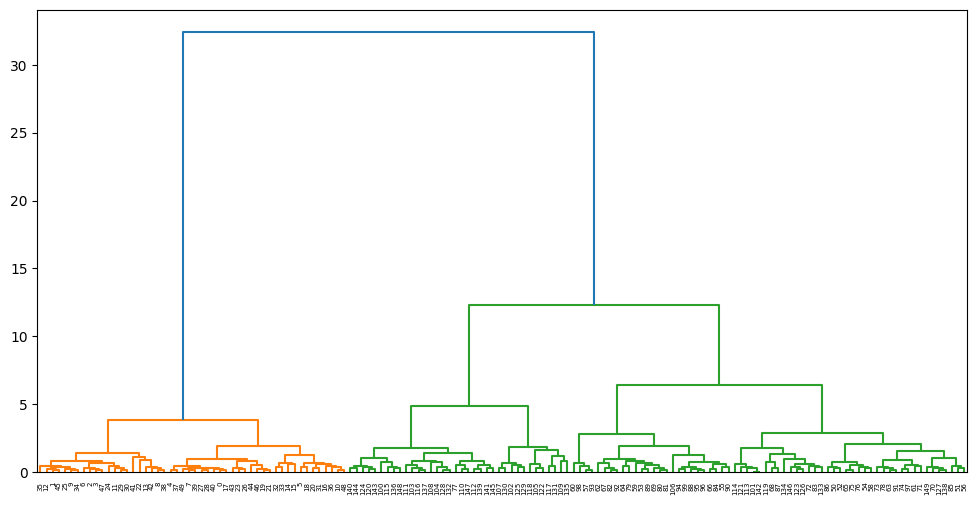

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

# Auswahl der numerischen Merkmale
features = data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]

# Hierarchisches Clustering (Linkage-Matrix)
Z = linkage(features, method='ward')

# Dendrogramm plotten
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.show()

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features)
print("KMeans Clusterzuordnung:", kmeans_labels[:10])

# Agglomerative (hierarchische) Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(features)
print(f"Agglomerative Clusterzuordnung:", agglo_labels[:10])

KMeans Clusterzuordnung: [1 1 1 1 1 1 1 1 1 1]
Agglomerative Clusterzuordnung: [1 1 1 1 1 1 1 1 1 1]


---
# Interpretation der Clustering-Ergebnisse

- Das Dendrogram kann am besten in 3 Gruppen aufgeteilt werden, was mit den KMeans- und Agglomerative-Clustering-Ergebnissen übereinstimmt.


## Supervised Learning

In [26]:
from sklearn.model_selection import train_test_split

# Features (X) und Zielvariable (y) definieren
X = features
y = data['species']

# Aufteilen in Trainings- und Testdaten (Hold-Out 80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Modell 1: K-Nearest Neighbors Modell trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Modell 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Vorhersagen für Testdaten mit KNN und Random Forest
pred_knn = knn.predict(X_test)
pred_rf = rf.predict(X_test)

# Accuracy berechnen
acc_knn = accuracy_score(y_test, pred_knn)
acc_rf = accuracy_score(y_test, pred_rf)

# Precision berechnen (macro)
prec_knn = precision_score(y_test, pred_knn, average='macro')
prec_rf = precision_score(y_test, pred_rf, average='macro')

# Recall berechnen (macro)
rec_knn = recall_score(y_test, pred_knn, average='macro')
rec_rf = recall_score(y_test, pred_rf, average='macro')

print("KNN:")
print("Accuracy:", round(acc_knn, 2))
print("Precision (macro):", round(prec_knn, 2))
print("Recall (macro):", round(rec_knn, 2))
print()
print("Random Forest:")
print("Accuracy:", round(acc_rf, 2))
print("Precision (macro):", round(prec_rf, 2))
print("Recall (macro):", round(rec_rf, 2))


KNN:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0

Random Forest:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0


---
# Interpretation Supervised Learning:
- Sowohl das KNN- als auch das Random Forest-Modell erreichen auf den Testdaten eine Accuracy, Precision und Recall von 1.0.
- Das bedeutet, dass alle Testbeispiele korrekt klassifiziert wurden.
- Die Modelle sind also sehr gut geeignet, um die Iris-Arten anhand der vier Merkmale zu unterscheiden.